# Class Workbook {.tabset .tabset-fade .tabset-pills}

## In class activity

In [2]:
import numpy as np
import pandas as pd
#import math
from matplotlib.pyplot import subplots
#import statsmodels.api as sm
from plotnine import *
#import plotly.express as px
#import statsmodels.formula.api as sm
#import ISLP as islp
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from ISLP.bart import BART
from ISLP import load_data
from ISLP.models import ModelSpec as MS
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import model_selection as skm
from sklearn.ensemble import GradientBoostingClassifier

### Bank Credit Data

Please take a look at the following credit scoring data set. This data was used to predict defaults on consumer loans. The data contains  1000 rows and 21 variables:

In [3]:
credit_data=pd.read_csv("credit_data.csv")

Here are the variables.

- BAD: factor, GOOD/BAD for whether a customer has defaulted on a loan. This is the outcome or target in this dataset
- Account_status: factor, status of existing checking account
- Duration: numeric, loan duration in month
- Credit_history: factor, previous credit history
- Purpose: factor, loan purpose
- Amount: numeric, credit amount
- Savings: factor, savings account/bonds
- Employment: factor, present employment since
- Installment_rate: numeric, installment rate in percentage of disposable income
- Guarantors: factor, other debtors / guarantors
- Resident_since: factor, present residence since
- Property: factor, property
- Age: numeric, age in years
- Other_plans: factor, other installment plans (bank ,none, stores )
- Housing: factor, housing
- Num_credits: numeric, Number of existing credits at this bank
- Job: factor, job( management / self-employed / highly qualified employee / officer; skilled employee / official ; unemployed / unskilled - non-resident ; unskilled - resident )
- People_maintenance: numeric, number of people being liable to provide maintenance for
- Phone: factor, telephone (none ; yes, registered under the customers name )
- Foreign: factor, foreign worker ( no ; yes )
- Female: factor, female/male for gender

Create a predictive model that predicts the outcome `BAD`.

In [4]:

# split the data
X_train, X_test, y_train, y_test = train_test_split(credit_data.loc[:,credit_data.columns != "BAD"], credit_data.loc[:,"BAD"], test_size=0.33, random_state=42)

credit_data_train  = pd.concat([X_train, y_train], axis=1)
credit_data_valid  = pd.concat([X_test, y_test], axis=1)

Evaluate your model performance.  What criteria do you think will be appropriate.

In [10]:

string_categorical_cols = ['Account_status', 'Credit_history', 'Purpose', 'Savings', 'Employment', 'Guarantors',
                           'Resident_since', 'Property', 'Other_plans', 'Housing', 'Job', 'Phone', 'Foreign', 'Female']
label_encoder = LabelEncoder()
for col in string_categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=10000, solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.703030303030303


Comment of the result:

~~~
Since the outcome is binary. The appropriate criteria I think is accuracy


~~~

### Ames Housing data

Please take a look at the Ames Housing data.

In [17]:
ames_raw=pd.read_csv("ames_raw.csv")

Use data of `ames_raw` up to 2008 predict the housing price for the later years.

In [18]:
# Do feature engineering if needed.
ames_raw_2009, ames_raw_2008= ames_raw.query('`Yr Sold`>=2008').copy(), ames_raw.query('`Yr Sold` <2008').copy()

Use the same loss function calculator.

In [19]:
def calc_loss(prediction,actual):
  difpred = actual-prediction
  RMSE =pow(difpred.pow(2).mean(),1/2)
  operation_loss=abs(sum(difpred[difpred<0]))+sum(0.1*actual[difpred>0])
  return RMSE,operation_loss

Apply CART and try to interpret the result that you get.  Be sure to fit the models on a training set and evaluate their performance on a test set.  Does it have a good prediction accuracy?

In [66]:
from sklearn.tree import DecisionTreeRegressor

cart_model = DecisionTreeRegressor()
object_cols = ames_raw_2008.select_dtypes(include=['object']).columns
ames_raw_2008 = ames_raw_2008.drop(columns=object_cols)
ames_raw_2008 = ames_raw_2008.dropna()
object_cols = ames_raw_2009.select_dtypes(include=['object']).columns
ames_raw_2009 = ames_raw_2009.drop(columns=object_cols)
ames_raw_2009 = ames_raw_2009.dropna()
X_train = ames_raw_2008.drop('SalePrice', axis=1)
y_train = ames_raw_2008['SalePrice']
X_test = ames_raw_2009.drop('SalePrice', axis=1)
y_test = ames_raw_2009['SalePrice']

In [67]:
mean_outcome = ames_raw_2008['SalePrice'].mean()

null_predictions = np.full(len(ames_raw_2009), mean_outcome)
print(calc_loss(null_predictions, y_test))

(81271.1436036626, 51624726.43783705)


(39839.88946588935, 31264516.1)


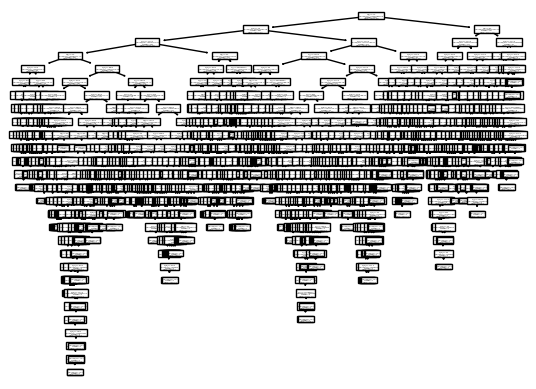

In [68]:
from sklearn.tree import plot_tree
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
plot_tree(cart_model)
print(calc_loss(y_pred,y_test))


Comment of the result:

~~~
Compared to null model, both operation_loss and RMSE reduced a lot in the CART model. I think it has a good prediction accuray.


~~~

Apply boosting, bagging, random forests, and BART to the Ames Housing data set. Be sure to fit the models on a training set and evaluate their performance on a test set. How accurate are the results compared to simple linear regression methods? Which of these approaches yields the best performance?

In [81]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from ISLP.bart import BART
GBR = GradientBoostingRegressor()
BR = BaggingRegressor()
RFR = RandomForestRegressor()
bart = BART(random_state=0, burnin=5, ndraw=15)
LM = LinearRegression()


In [88]:
GBR.fit(X_train, y_train)
y_pred1 = GBR.predict(X_test)
print(calc_loss(y_pred1, y_test))
BR.fit(X_train, y_train)
y_pred2 = BR.predict(X_test)
print(calc_loss(y_pred2, y_test))
RFR.fit(X_train, y_train)
y_pred3 = RFR.predict(X_test)
print(calc_loss(y_pred3, y_test))
bart.fit(X_train, y_train)
y_pred5 = bart.predict(np.asarray(X_test))
print(calc_loss(y_pred5, y_test))
LM.fit(X_train, y_train)
y_pred4 = LM.predict(X_test)
print(calc_loss(y_pred4, y_test))

(24937.8050621255, 22220443.69425279)
(30157.132454816696, 25205404.500000015)
(27742.81456939492, 23756711.989999995)
(36354.82753453961, 24255367.809690133)


Comment of the result:

~~~
All methods are much better than the linear regression in accuracy except the BART model.


~~~

## Problem Set

### Boston


In Section 8.3.3, we applied random forests to the Boston data using max_features = 6 and using n_estimators = 100 and n_estimators = 500. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for max_features and n_estimators. You can model your plot after Figure 8.10. Describe the results obtained.

In [107]:
from ISLP import load_data
from ISLP.models import ModelSpec as MS
Boston = load_data("Boston")
model = MS(Boston.columns.drop('medv'), intercept=False)
D = model.fit_transform(Boston)
feature_names = list(D.columns)
X = np.asarray(D)
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(X,
                                Boston['medv'],
                                test_size=0.3,
                                random_state=0)

loss1 = []
for i in range(1,30,1):
    bag_boston = RandomForestRegressor(max_features=i,n_estimators=500, random_state=0)
    bag_boston.fit(X_train, y_train)
    y_hat_bag = bag_boston.predict(X_test)
    print(np.mean((y_test - y_hat_bag)**2))
    loss1.append(np.mean((y_test - y_hat_bag)**2))

loss2 = []
for i in range(100,3000,100):
    bag_boston = RandomForestRegressor(max_features=6,n_estimators=i, random_state=0)
    bag_boston.fit(X_train, y_train)
    y_hat_bag = bag_boston.predict(X_test)
    print(np.mean((y_test - y_hat_bag)**2))
    loss2.append(np.mean((y_test - y_hat_bag)**2))




22.937420472631583
20.457175833157915
19.648272746578957
19.143843976052658
17.985562989999995
18.75262661473685
17.077837820263152
16.79051183157895
16.326756785000008
15.709832309999994
15.00151015552631
14.565312103157904
14.565312103157904
14.565312103157904
14.565312103157904
14.565312103157904
14.565312103157904
14.565312103157904
14.565312103157904
14.565312103157904
14.565312103157904
14.565312103157904
14.565312103157904
14.565312103157904
14.565312103157904
14.565312103157904
14.565312103157904
14.565312103157904
14.565312103157904
19.998839111842113
19.455285097039464
18.946205293859627
18.808753284128272
18.75262661473685
18.466307583333357
18.353587557599372
18.19144460115133
18.176657192738823
18.092829141973738
18.116714258047033
17.931848416392604
17.959411844441032
17.935793602544358
17.932237321081907
17.92591274537421
17.881591286787497
17.873941834917133
17.856631933499727
17.81914295524664
17.825551841732203
17.821866832549357
17.839538727701097
17.839411848227194


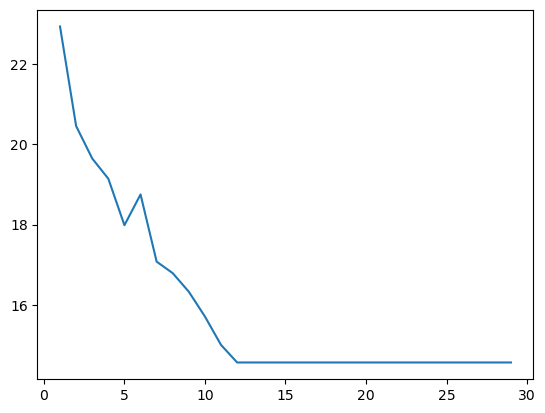

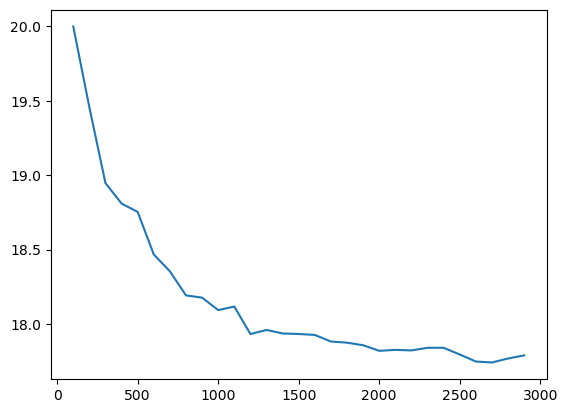

In [108]:
import matplotlib.pyplot as plt
plt.plot(range(1,30,1),loss1)
plt.show()
plt.plot(range(100,3000,100),loss2) 
plt.show()

###

In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

In [84]:
Carseats = load_data("Carseats")

(a) Split the data set into a training set and a test set.

In [132]:
X = Carseats.drop(columns=['Sales'])  
y = Carseats['Sales']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
string_categorical_cols = ['ShelveLoc', 'Urban', 'US']
label_encoder = LabelEncoder()
for col in string_categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [135]:
print(X_train.dtypes)
print(X_train.head())

CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int64
Age            int64
Education      int64
Urban          int64
US             int64
dtype: object
     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
3          117     100            4         466     97          2   55   
18         110     110            0         408     68          1   46   
202        121      78            4         413    130          0   46   
250        137     105           10         435    156          1   72   
274        135      93            2          67    119          2   34   

     Education  Urban  US  
3           14      1   1  
18          17      0   1  
202         10      0   1  
250         14      1   1  
274         11      1   1  


(b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

5.7566999999999995


[Text(0.27036328665283543, 0.96875, 'x[4] <= 94.5\nsquared_error = 7.412\nsamples = 320\nvalue = 7.388'),
 Text(0.06686549100968188, 0.90625, 'x[5] <= 0.5\nsquared_error = 5.659\nsamples = 54\nvalue = 9.755'),
 Text(0.024204702627939143, 0.84375, 'x[1] <= 49.0\nsquared_error = 4.888\nsamples = 13\nvalue = 7.861'),
 Text(0.011065006915629323, 0.78125, 'x[6] <= 50.0\nsquared_error = 2.793\nsamples = 4\nvalue = 5.568'),
 Text(0.005532503457814661, 0.71875, 'x[7] <= 16.5\nsquared_error = 0.096\nsamples = 2\nvalue = 7.19'),
 Text(0.0027662517289073307, 0.65625, 'squared_error = 0.0\nsamples = 1\nvalue = 7.5'),
 Text(0.008298755186721992, 0.65625, 'squared_error = 0.0\nsamples = 1\nvalue = 6.88'),
 Text(0.016597510373443983, 0.71875, 'x[6] <= 64.0\nsquared_error = 0.226\nsamples = 2\nvalue = 3.945'),
 Text(0.013831258644536652, 0.65625, 'squared_error = 0.0\nsamples = 1\nvalue = 4.42'),
 Text(0.019363762102351315, 0.65625, 'squared_error = -0.0\nsamples = 1\nvalue = 3.47'),
 Text(0.037344398

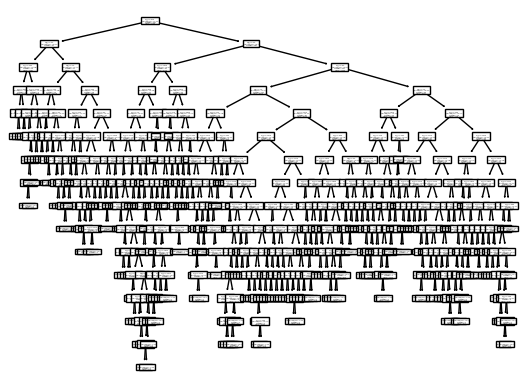

In [137]:
RT = DecisionTreeRegressor()
RT.fit(X_train, y_train)
y_pred = RT.predict(X_test)
print(np.mean((y_test - y_pred)**2))
plot_tree(RT)

(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

In [143]:
from sklearn.model_selection import KFold, GridSearchCV
ccp_path = RT.cost_complexity_pruning_path(X_train, y_train)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(RT, param_grid={'ccp_alpha': ccp_path.ccp_alphas}, refit = True, cv=kfold, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'ccp_alpha': 0.13412634596946038}
-4.1705528315062965


any split that does not decrease the total impurity of a tree by at least 0.13412634596946083 will be pruned. The pruning improve the test MSE. The MSE decreased from 5.7567 to 4.17055

(d) Use the bagging approach in order to analyze this data. What
test MSE do you obtain? Use the feature_importance_ values to
determine which variables are most important.

In [152]:
bag_carseats = RandomForestRegressor(max_features=X_train.shape[1],random_state=0)
bag_carseats.fit(X_train, y_train)
y_hat_bag = bag_carseats.predict(X_test)
print(np.mean((y_test - y_hat_bag)**2))
feature_imp = pd.DataFrame({"importance":bag_carseats.feature_importances_}, index=X_train.columns)
feature_imp.sort_values(by="importance",ascending=False)

3.1598648349999987


,importance
Price,0.319711
ShelveLoc,0.232728
Age,0.119643
CompPrice,0.093909
Advertising,0.090657
Income,0.054776
Population,0.042764
Education,0.034463
Urban,0.006264
US,0.005085


MSE:3.17388

The most important variable: Price

(e) Use random forests to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine
which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate
obtained.

In [153]:
RF_carseats = RandomForestRegressor(max_features=10,n_estimators=500, random_state=0)
RF_carseats.fit(X_train, y_train)
y_hat_RF = RF_carseats.predict(X_test)
print(np.mean((y_test - y_hat_RF)**2))
feature_imp = pd.DataFrame({"importance":RF_carseats.feature_importances_}, index=X_train.columns)
feature_imp.sort_values(by="importance",ascending=False)

3.226834117585006


,importance
Price,0.318115
ShelveLoc,0.229727
Age,0.116988
Advertising,0.096935
CompPrice,0.096159
Income,0.054627
Population,0.042784
Education,0.032980
Urban,0.005990
US,0.005693


MSE:3.226834117585006

The most important variable: Price


low m will results in high bias: If m is too low, the trees in the forest may become too similar to each other, leading to high bias. The trees will not be able to capture the complexity in the data, which could increase the error rate due to underfitting.

High m will results in high variance: If m is too high, individual trees may become too complex and may overfit to their bootstrap samples. This can increase the variance of the overall model, which might lead to a lower error rate on the training data but a higher error rate on unseen data due to overfitting.

(f) Now analyze the data using BART, and report your results.

In [154]:
bart_carseats = BART(random_state=0, burnin=5, ndraw=15)
bart_carseats.fit(X_train, y_train)
y_hat_bart = bart_carseats.predict(np.asarray(X_test))
print(np.mean((y_test - y_hat_bart)**2))

1.4454425160444142


MSE of BART model is the lowest. It's 1.4454425160444142

### OJ

This problem involves the OJ data set which is part of the ISLR2 package.

In [209]:
OJ = load_data("OJ")

(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

Your code:

In [210]:
le = LabelEncoder()
OJ["Store7"] = le.fit_transform(OJ["Store7"])

train, test = train_test_split(OJ,
                                   train_size=800,
                                   random_state=0
                                   )
print(train.shape, test.shape)


(800, 18) (270, 18)


Your answer:

~~~
Please write your answer in full sentences.


~~~

(b) Fit a tree to the training data, with Purchase as the response
and the other variables as predictors. What is the training error
rate?

Your code:

In [219]:
from sklearn.tree import DecisionTreeClassifier, export_text
X_train = train.drop(['Purchase'], axis=1)
y_train = train['Purchase']

X_test = test.drop(['Purchase'], axis=1)
y_test = test['Purchase']

clf = DecisionTreeClassifier(criterion='entropy', 
          max_depth=3,
          random_state=0)
clf.fit(X_train, y_train)
1-accuracy_score(y_test, clf.predict(X_test))

0.18888888888888888

Your answer:

~~~
The training error rate is 0.19


~~~

(c) Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?
Your code:

[Text(0.5, 0.875, 'LoyalCH <= 0.509\nentropy = 0.954\nsamples = 800\nvalue = [500, 300]'),
 Text(0.25, 0.625, 'LoyalCH <= 0.282\nentropy = 0.87\nsamples = 340\nvalue = [99, 241]'),
 Text(0.125, 0.375, 'LoyalCH <= 0.035\nentropy = 0.578\nsamples = 160\nvalue = [22, 138]'),
 Text(0.0625, 0.125, 'entropy = 0.144\nsamples = 49\nvalue = [1, 48]'),
 Text(0.1875, 0.125, 'entropy = 0.7\nsamples = 111\nvalue = [21, 90]'),
 Text(0.375, 0.375, 'PriceDiff <= 0.05\nentropy = 0.985\nsamples = 180\nvalue = [77, 103]'),
 Text(0.3125, 0.125, 'entropy = 0.722\nsamples = 70\nvalue = [14, 56]'),
 Text(0.4375, 0.125, 'entropy = 0.985\nsamples = 110\nvalue = [63, 47]'),
 Text(0.75, 0.625, 'LoyalCH <= 0.705\nentropy = 0.553\nsamples = 460\nvalue = [401, 59]'),
 Text(0.625, 0.375, 'PriceDiff <= 0.265\nentropy = 0.873\nsamples = 150\nvalue = [106, 44]'),
 Text(0.5625, 0.125, 'entropy = 0.998\nsamples = 87\nvalue = [46, 41]'),
 Text(0.6875, 0.125, 'entropy = 0.276\nsamples = 63\nvalue = [60, 3]'),
 Text(0.875, 

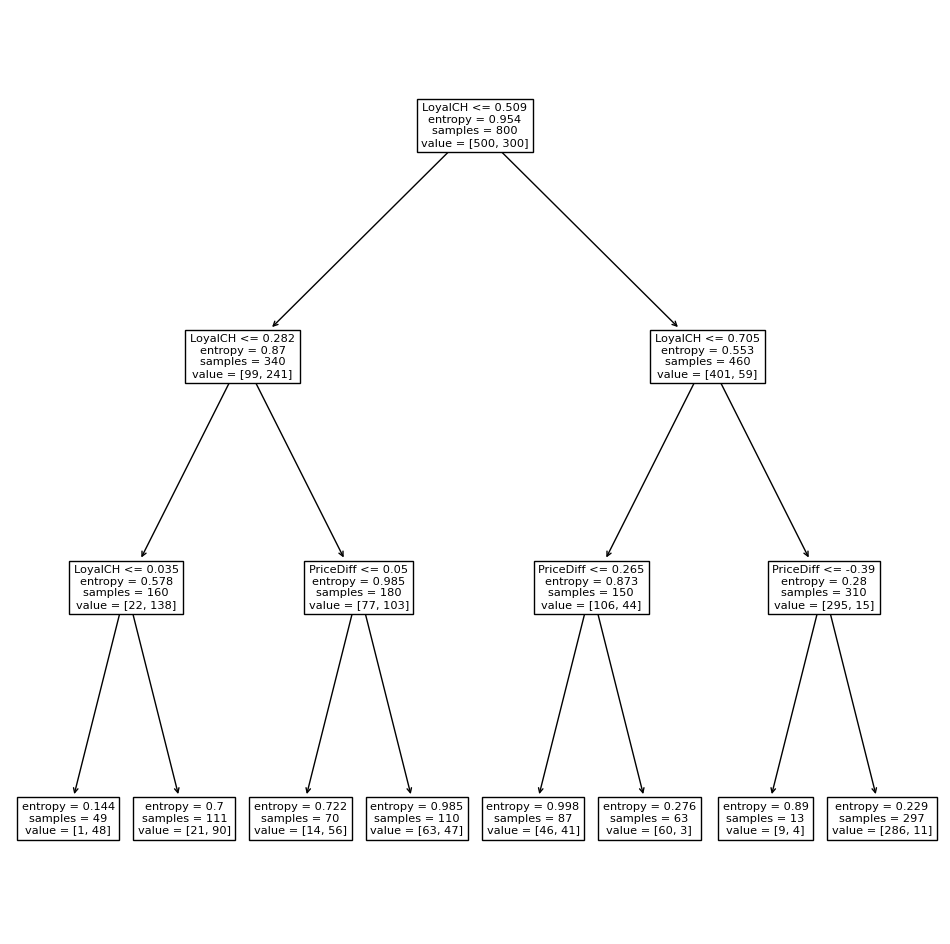

In [231]:
from ISLP.models import ModelSpec as MS
model = MS(OJ.columns.drop('Purchase'), intercept=False)
D = model.fit_transform(OJ)
feature_names = list(D.columns)

X = np.asarray(D)
ax = subplots(figsize=(12,12))[1]
plot_tree(clf,
          feature_names=feature_names,
          ax=ax)

Your answer:

~~~
There are 8 terminal nodes


~~~

(d) Use the export_tree() function to produce a text summary of
the fitted tree. Pick one of the terminal nodes, and interpret the
information displayed.

In [216]:
print(export_text(clf,
                  feature_names=feature_names,
                  show_weights=True))

|--- LoyalCH <= 0.51
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.04
|   |   |   |--- weights: [1.00, 48.00] class: MM
|   |   |--- LoyalCH >  0.04
|   |   |   |--- weights: [21.00, 90.00] class: MM
|   |--- LoyalCH >  0.28
|   |   |--- PriceDiff <= 0.05
|   |   |   |--- weights: [14.00, 56.00] class: MM
|   |   |--- PriceDiff >  0.05
|   |   |   |--- weights: [63.00, 47.00] class: CH
|--- LoyalCH >  0.51
|   |--- LoyalCH <= 0.71
|   |   |--- PriceDiff <= 0.27
|   |   |   |--- weights: [46.00, 41.00] class: CH
|   |   |--- PriceDiff >  0.27
|   |   |   |--- weights: [60.00, 3.00] class: CH
|   |--- LoyalCH >  0.71
|   |   |--- PriceDiff <= -0.39
|   |   |   |--- weights: [9.00, 4.00] class: CH
|   |   |--- PriceDiff >  -0.39
|   |   |   |--- weights: [286.00, 11.00] class: CH



(e) Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?

Your code:

In [221]:
from ISLP import confusion_table
print(1-accuracy_score(y_test,
                     clf.predict(X_test)))
confusion = confusion_table(clf.predict(X_test),
                            y_test)
confusion

0.18888888888888888


Truth,CH,MM
Predicted,,
CH,138,36
MM,15,81


Your answer:

~~~
Test error rate is 0.19


~~~

(f) Use cross-validation on the training set in order to determine
the optimal tree size.
Your code:

In [220]:
from sklearn import model_selection as skm
validation = skm.ShuffleSplit(n_splits=5,
                              train_size=800,
                              random_state=0)

results = skm.cross_validate(clf,
                             D,
                             OJ["Purchase"],
                             cv=validation)
results['test_score']

array([0.81111111, 0.84074074, 0.83333333, 0.83703704, 0.83333333])

Your answer:

~~~



~~~

(g) Produce a plot with tree size on the x-axis and cross-validated
classification error rate on the y-axis.
Your code:

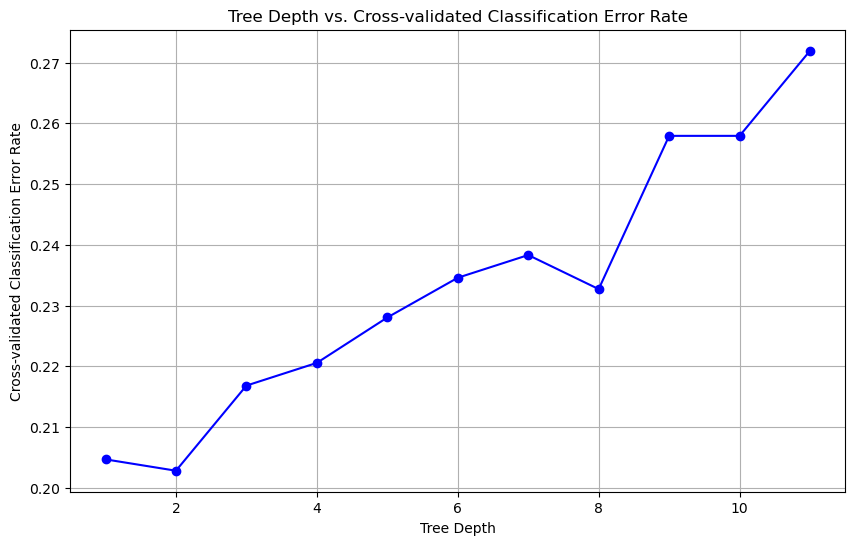

In [223]:
tree_depths = range(1,12)
error_rates = []
for depth in tree_depths:
    cv_clf = DecisionTreeClassifier(max_depth=depth)
    score = skm.cross_val_score(cv_clf, OJ.drop(["Purchase"], axis=1), OJ["Purchase"], cv=10, scoring='accuracy')
    error_rate = 1 - np.mean(score)
    error_rates.append(error_rate)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(tree_depths, error_rates, marker='o', linestyle='-', color='b')
plt.title('Tree Depth vs. Cross-validated Classification Error Rate')
plt.xlabel('Tree Depth')
plt.ylabel('Cross-validated Classification Error Rate')
plt.grid(True)
plt.show()

Your answer:

~~~
The plot is shown above.


~~~

(h) Which tree size corresponds to the lowest cross-validated classification error rate?

Your code:

Your answer:

~~~
The tree depth of 2 corresponds to the lowest cross-validated classification error rate.


~~~

(i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with five terminal nodes.

Your code:

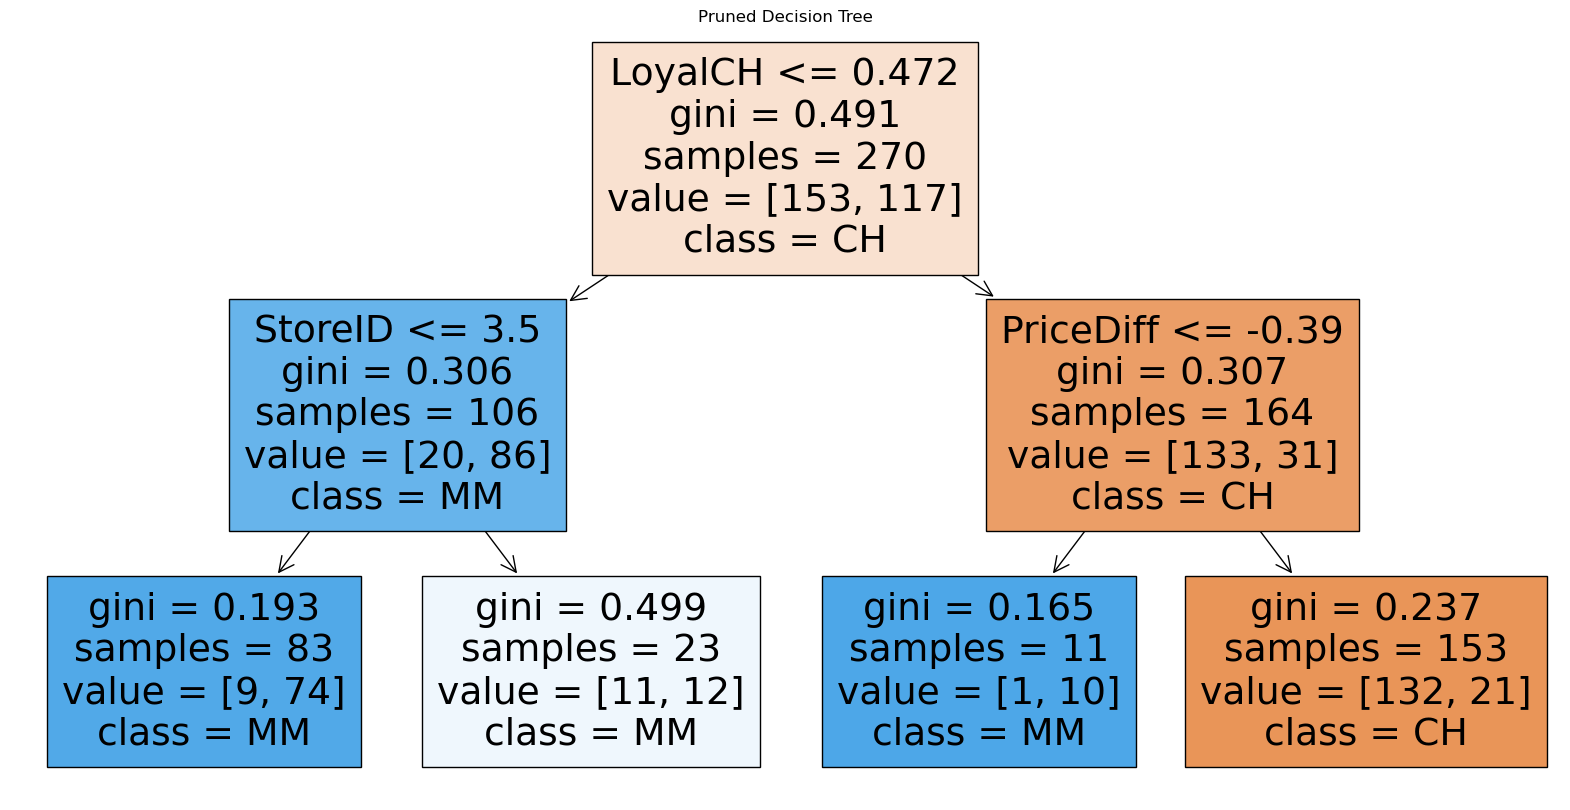

In [236]:
pruned_clf = DecisionTreeClassifier(max_depth=2)
pruned_clf.fit(X_test, y_test)


# Step 4: Visualize the pruned tree
plt.figure(figsize=(20,10))
plot_tree(pruned_clf, filled=True, feature_names=list(D.columns), class_names=["CH", "MM"])
plt.title("Pruned Decision Tree")
plt.show()

Your answer:

~~~
Please write your answer in full sentences.


~~~

(j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

Your code:

In [228]:
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_train, pruned_clf.predict(X_train)))

0.8225
0.8075


Your answer:

~~~
Unpruned tree has higher training error.


~~~


(k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

Your code:

In [ ]:
print(accuracy_score(y_test, clf.predict(X_test)))
print(accuracy_score(y_test, pruned_clf.predict(X_test)))

Your answer:

~~~
Pruned tree has higher training error.


~~~

### Hitters

We now use boosting to predict Salary in the Hitters data set.

In [161]:
Hitters = load_data("Hitters")

(a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

Your code:

In [162]:
Hitters = Hitters.dropna(subset=['Salary'])
Hitters['Salary'] = np.log(Hitters['Salary'])

Your answer:

~~~
The preprocessing is shown above


~~~

(b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

Your code:

In [171]:
train_set = Hitters.iloc[:200]
test_set = Hitters.iloc[200:]

X_train = train_set.drop(columns=['Salary'])
y_train = train_set['Salary']
X_test = test_set.drop(columns=['Salary'])
y_test = test_set['Salary']

string_categorical_cols = ['League', 'Division', 'NewLeague']
label_encoder = LabelEncoder()
for col in string_categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

Your answer:

~~~
The training and testing set is shown above.


~~~

(c) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter $lambda$. Produce a plot with different shrinkage values on the x-axis and the corresponding
training set MSE on the y-axis.

Your code:

In [175]:
mse = []
for i in np.arange(0.001,0.01,0.001):
    boost_hitters = GradientBoostingRegressor(n_estimators=1000, learning_rate=i, max_depth=3, random_state=0)
    boost_hitters.fit(X_train, y_train)
    y_pred = boost_hitters.predict(X_test)
    print(np.mean((y_test - y_pred)**2))
    mse.append(np.mean((y_test - y_pred)**2))


0.25826935300598397
0.20904068178981736
0.2059245346417001
0.20569770846951593
0.2089168397262686
0.21111315218717566
0.2117011377616129
0.2141815407460576
0.214115325717728


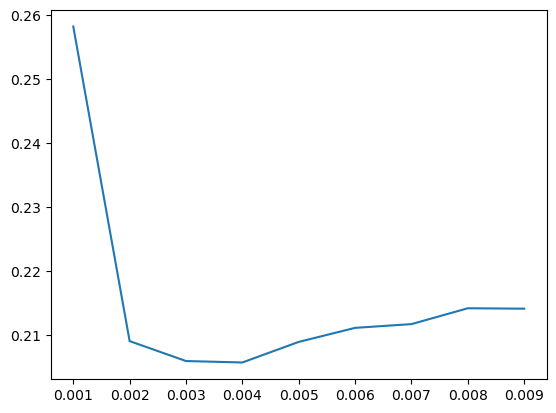

In [176]:
plt.plot(np.arange(0.001,0.01,0.001),mse)

Your answer:

~~~
MSE reaches the lowest point when lambda near 0.04.

~~~

(d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

Your code:

In [ ]:
plt.plot(np.arange(0.001,0.01,0.001),mse)

Your answer:

~~~
MSE reaches the lowest point when lambda near 0.04.


~~~





(f) Which variables appear to be the most important predictors in the boosted model?

Your code:

In [178]:
feature_imp = pd.DataFrame(
    {'importance':boost_hitters.feature_importances_},
    index=X_train.columns)
feature_imp.sort_values(by='importance', ascending=False)

,importance
CAtBat,0.531435
CHits,0.098923
CRuns,0.054295
AtBat,0.049559
Walks,0.044838
CRBI,0.036722
CHmRun,0.034893
CWalks,0.033829
Years,0.027920
Hits,0.025240


Your answer:

~~~
CArBat is the most important predictor in boosting model


~~~

(g) Now apply bagging to the training set. What is the test set MSE for this approach?

Your code:

In [179]:
bag_hit = RandomForestRegressor(max_features=X_train.shape[1], random_state=0)
bag_hit.fit(X_train, y_train)
y_hat_bag = bag_hit.predict(X_test)
print(np.mean((y_test - y_hat_bag)**2))

0.23804094451807437


Your answer:

~~~
MSE: 0.23804


~~~

### Caravan

This question uses the `Caravan` data set.

In [181]:
Caravan = load_data("Caravan")

(a) Create a training set consisting of the first 1,000 observations, and a test set consisting of the remaining observations.

Your code:

In [182]:
print(Caravan.head())
print(Caravan.dtypes)

   MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0       33         1        3         2         8       0       5       1   
1       37         1        2         2         8       1       4       1   
2       37         1        2         2         8       0       4       2   
3        9         1        3         3         3       2       3       2   
4       40         1        4         2        10       1       4       1   

   MGODGE  MRELGE  ...  APERSONG  AGEZONG  AWAOREG  ABRAND  AZEILPL  APLEZIER  \
0       3       7  ...         0        0        0       1        0         0   
1       4       6  ...         0        0        0       1        0         0   
2       4       3  ...         0        0        0       1        0         0   
3       4       5  ...         0        0        0       1        0         0   
4       4       7  ...         0        0        0       1        0         0   

   AFIETS  AINBOED  ABYSTAND  Purchase  
0       0

In [192]:
train_set = Caravan.iloc[:1000]
test_set = Caravan.iloc[1000:]


X_train = train_set.drop(columns=['Purchase'])
y_train = train_set['Purchase']
X_test = test_set.drop(columns=['Purchase'])
y_test = test_set['Purchase']



In [193]:
print(y_train.head())

0    No
1    No
2    No
3    No
4    No
Name: Purchase, dtype: object


(b) Fit a boosting model to the training set with `Purchase` as the response and the other variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?

Your code:

In [195]:
from sklearn.ensemble import GradientBoostingClassifier
clf_caravan = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01, random_state=0)
clf_caravan.fit(X_train, y_train)
y_pred = clf_caravan.predict(X_test)
print(np.mean(y_pred == y_test))
feature_imp = pd.DataFrame(
    {'importance':clf_caravan.feature_importances_},
    index=X_train.columns)
feature_imp.sort_values(by='importance', ascending=False)

0.9340522604728329


,importance
PPERSAUT,0.074515
MOSTYPE,0.065189
ABRAND,0.057117
MGODGE,0.052929
MKOOPKLA,0.047575
...,...
APERSONG,0.000000
PBESAUT,0.000000
PVRAAUT,0.000000
PWERKT,0.000000


Your answer:

~~~
The accuracy for this prediction is 0.93405
The most important predictor is PPERSAUT

~~~


(c) Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20 %. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

Your code:

In [208]:
from sklearn.metrics import accuracy_score
confusion = confusion_table(y_pred, y_test)
confusion = pd.DataFrame(confusion)
print(confusion)
print(accuracy_score(y_test, y_pred))
print(confusion.iloc[1,1]/(confusion.iloc[1,0]+confusion.iloc[1,1]))  

Truth        No  Yes
Predicted           
No         4489  274
Yes          44   15
0.9340522604728329
0.2542372881355932


Your answer:

~~~
The fraction is 0.2542. The result is more accurate than KNN and logistic regression


~~~

## Additional Material

In this section we will look at other popular tree based methods that are readily available.
For classification we will use the [iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) .

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris_X=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_y=pd.DataFrame(iris.target,columns=['Class'])

# split the data
X_train0, X_test, y_train0, y_test = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)
trainData = pd.concat([X_train0, y_train0], axis=1)
testData  = pd.concat([X_test, y_test], axis=1)

### CART graph

https://github.com/Sidon/Sidon.github.io/blob/master/_posts/dtree-w1.ipynb

In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

In [ ]:
# Fit CART  Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from io import StringIO
import pydotplus
import sklearn
import sklearn.metrics
from IPython.display import Image
out = StringIO()
clf = DecisionTreeClassifier()
clf = clf.fit(X_train0,y_train0)

# you will need to install graphviz
tree.export_graphviz(clf, out_file=out, feature_names=iris.feature_names,class_names=['0','1','2'],
                     filled=True, rounded=True, special_characters=True)

graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

predictions=clf.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test,predictions)
plot_confusion_matrix(confusion_matrix,['Setosa','Versicolour','Virginica'])

### XGBoost

XGBoost became popular due to its success in Kaggle competitions.  It's essentially a gradient boosting but implemented to perform better out of the box.  Some of the nice features include:

- Default regularization
- Tree growing and pruning scheme allows for multiple cuts
- Computational efficiency by parallelization
- A couple of default choices to make it easier to use
- Handles missing data

However, if you want to go deeper, there are some challenges/concerns.

- Hyperparameter tuning is hard
- Missing data imputation scheme is concerning
- Cannot handle categorical variables

Here is it used for the iris data.

In [ ]:
import xgboost as xgb

param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softmax'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
param['num_class'] = 3

num_round = 10

dtrain = xgb.DMatrix(X_train0, label=y_train0)
dtest = xgb.DMatrix(X_test, label=y_test)
evallist = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(param, dtrain, num_round, evallist)
ypred = bst.predict(dtest)

What gets unwieldy is when you start to tune the parameters.
Here is the list of parameters used.  Not all of them need tuning, but I hope you understand.

- General Parameters that define the overall functionality of XGBoost.
  - booster [default=gbtree]: type of model
  - silent [default=0]: display log?
  - nthread [default to the maximum number of threads available if not set]: number of cores
- Learning Task Parameters define the optimization objective and the metric to be calculated at each step.
  - objective [default=reg:linear] the loss function to be minimized.
  - eval_metric [ default according to objective ] The metric for validation data.
  - seed [default=0] The random number seed.
- Booster Parameters
  - eta [default=0.3]. Analogous to the learning rate in GBM
  - min_child_weight [default=1] is the minimum sum of weights of all observations required in a child.
  - max_depth [default=6] The maximum depth of a tree, same as GBM.
  - max_leaf_nodes  The maximum number of terminal nodes or leaves in a tree.
  - gamma [default=0] is the minimum loss reduction required to make a split.
  - max_delta_step [default=0]  If it is set to a positive value makes the update step more conservative.
  - subsample [default=1] the fraction of observations randomly sampled for each tree.
  - colsample_bytree [default=1] is the fraction of columns randomly sampled for each tree.
  - colsample_bylevel [default=1] the subsample ratio of columns for each split, in each level.
  - lambda [default=1]  L2 regularization term on weights (analogous to Ridge regression)
  - alpha [default=0] L1 regularization term on weight (analogous to Lasso regression)
  - scale_pos_weight [default=1] >0 for high class imbalance as it helps in faster convergence.

Because of this, there is an automatic versiong of xgboost exists. But I was not able to install it on my machine.

In [ ]:
#from autoxgb import AutoXGB

### catboost

Catboost is another popular boosting method that in my view popular due to well thought out implementation.
The three features that distingishes itself from the other similar models are

- Symmetric tree
- Ordered Boosting
- Categorical Feature Engineering


 https://catboost.ai/en/docs/concepts/r-usages-examples

In [ ]:
# library(catboost)
# # load data
# set.seed(1)
# idx=sample(1:nrow(iris),nrow(iris)*.7)
# train=iris[idx,]
# test=iris[-idx,]
# fit_control <- caret::trainControl(
#   method = "cv",
#   number = 3,
#   search = "random",
#   classProbs = TRUE
# )
# # set grid options
# grid <- expand.grid(
#   depth = c(4, 6, 8),
#   learning_rate = 0.1,
#   l2_leaf_reg = 0.1,
#   rsm = 0.95,
#   border_count = 64,
#   iterations = 10
# )
# model <- caret::train(
#   x = train[,-5],
#   y = train[,5],
#   method = catboost.caret,
#   metric = "Accuracy",
#   maximize = TRUE,
#   preProc = NULL,
#   tuneGrid = grid,
#   tuneLength = 30,
#   trControl = fit_control
# )
# table(test$Species,predict(model,test))

### Ensemble model

Bagging, Random Forest, and Boosting are examples of ensemble models.
The idea is to combine models to get a better result than any individual model can achieve.
So far, we’ve combined the same models, but that need not be the case.
One way to combine the results is to just average the outcomes from different models.
But one need not trust the results from all models equally.
An alternative way is to use the predictions as input into a regression model to create weights representing the level of trust in the model.

Stacking is easy to implement but even easier if you use caret.
For example, if you want to do 10 fold Repeated CV to fit CART, knn, logistic regression,Gaussian Naive Bayes and svc, then combine the results.

You can find more details [here](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/).

In [ ]:
# pip install datapackage
from datapackage import Package
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

package = Package('https://datahub.io/machine-learning/sonar/datapackage.json')
resources = package.resources
Sonar = pd.read_csv(resources[1].descriptor['path'])

Sonar_y=Sonar.loc[:,"Class"]
Sonar_x=Sonar.drop(["Class"], axis=1)

level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
stacking = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
cv = RepeatedKFold(n_splits=10, n_repeats=3)
scores = cross_val_score(stacking, Sonar_x, Sonar_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')